In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to calculate portfolio return and standard deviation


def calculate_portfolio_stats(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_std_dev


# Generate random data for demonstration
np.random.seed(42)
num_assets = 3
mean_returns = np.random.rand(num_assets)
cov_matrix = np.random.rand(num_assets, num_assets)

# Define objective function for optimization


def objective(weights, mean_returns, cov_matrix):
    portfolio_return, portfolio_std_dev = calculate_portfolio_stats(
        weights, mean_returns, cov_matrix)
    return portfolio_std_dev


# Define constraints
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Define bounds for weights (0 to 1)
bounds = tuple((0, 1) for asset in range(num_assets))

# Initial guess for weights
initial_weights = np.ones(num_assets) / num_assets

# Optimize using scipy's minimize function
result = minimize(objective, initial_weights, (mean_returns, cov_matrix),
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Extract optimized weights
optimized_weights = result.x






In [7]:
# Generate portfolios for the Markowitz Frontier
returns = []
volatilities = []
for ret in np.linspace(0.05, 0.2, num=100):
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
                   {'type': 'eq', 'fun': lambda weights: calculate_portfolio_stats(weights, mean_returns, cov_matrix)[0] - ret})

    result = minimize(objective, initial_weights, (mean_returns, cov_matrix),
                      method='SLSQP', bounds=bounds, constraints=constraints)

    weights = result.x
    portfolio_return, portfolio_std_dev = calculate_portfolio_stats(
        weights, mean_returns, cov_matrix)
    returns.append(portfolio_return)
    volatilities.append(portfolio_std_dev)

In [16]:
returns

[0.3745401188473625,
 0.3745401188473625,
 0.37454011884748056,
 0.3745401188473625,
 0.3745401188473625,
 0.3745401188473625,
 0.3745401188474188,
 0.3745401188473625,
 0.3745401188473625,
 0.3745401188473625,
 0.374540118847363,
 0.3745401188473625,
 0.3745401188473625,
 0.37454011884738264,
 0.3745401188473844,
 0.3745401188473626,
 0.37454011884736255,
 0.37454011884746446,
 0.3745401188473626,
 0.3745401188473625,
 0.3745401188473625,
 0.3745401188473625,
 0.3745401188473625,
 0.3745401188476015,
 0.3745401188473625,
 0.37454011884740457,
 0.37454011884736255,
 0.3745401188473625,
 0.37454011884736255,
 0.3745401188473625,
 0.3745401188473625,
 0.37454011884741045,
 0.3745401188473625,
 0.37454011884736255,
 0.3745401188473625,
 0.37454011884736255,
 0.3745401188473625,
 0.37454011884741023,
 0.3745401188473625,
 0.3745401188476738,
 0.3745401188473626,
 0.37454011884736255,
 0.3745401188480263,
 0.3745401188473625,
 0.3745401188473625,
 0.37454011884779226,
 0.3745401188473625,
 

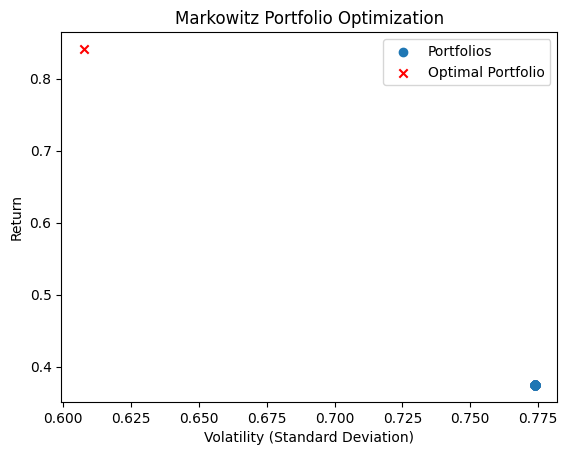

In [14]:
# Plot the Markowitz Frontier
plt.scatter(volatilities, returns, marker='o', label='Portfolios')
plt.scatter(optimized_weights @ mean_returns, optimized_weights @
            np.sqrt(np.diag(cov_matrix)), marker='x', color='r', label='Optimal Portfolio')
plt.title('Markowitz Portfolio Optimization')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
plt.show()
